In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial.distance import cdist

In [10]:
np.random.seed(0)

count_per_clusters = 30
count_clusters = 3
K = 3 # count clusters

X = shuffle(np.concatenate((
    -10 + 20 * 0 + 15 * np.random.rand(count_per_clusters, 2),
    -10 + 20 * 1 + 15 * np.random.rand(count_per_clusters, 2),
    -10 + 20 * 2 + 15 * np.random.rand(count_per_clusters, 2),
), axis=0))

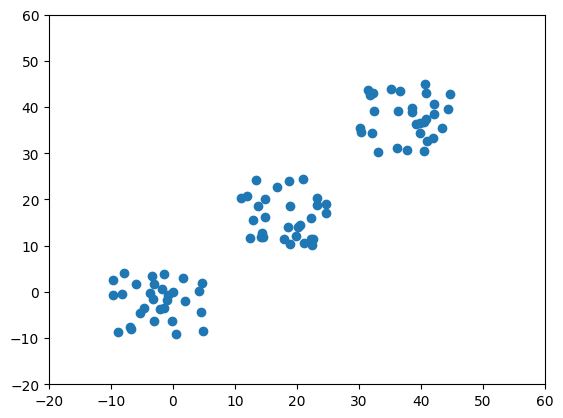

In [11]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-20, 60, -20, 60]);

[37.81949362 37.78080453] [44.34125452 39.65985299]
[-2.56942054 -1.93818176] [-8.93445913 -8.6930605 ]
[18.17276591 16.14834781] [22.43410044 10.07043214]
[37.81949362 37.78080453] [37.81949362 37.78080453]
[-2.56942054 -1.93818176] [-2.56942054 -1.93818176]
[18.17276591 16.14834781] [18.17276591 16.14834781]
1


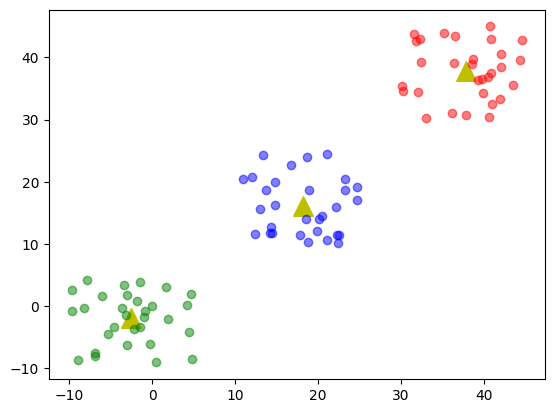

In [26]:
# Native code

centroids = np.array([X[0]])

for _ in range(1, K):
    lm = 0
    
    for x in X:
        mv = 1e9
        
        for c in centroids:
            t = np.sum((x - c) ** 2)
            if t < mv:
                mv = t
                mi = x
            
        if mv > lm:
            li = mi
            lm = mv
            
    centroids = np.append(centroids, [li], axis=0)
    
y = np.zeros(count_clusters * count_per_clusters, dtype=np.int8)
t = np.zeros((count_clusters, 2))
colors = {
    0: "r",
    1: "g",
    2: "b"
}

# K-Means
for _ in range(10):
    d = np.argmin(cdist(centroids, X), axis=0)
    b = True
    for k in range(K):
        t = np.mean(X[d == k, :], axis=0)
        b = b & (np.array_equal(t, centroids[k]))
        centroids[k] = t
        
    if b:
        print(_)
        break
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker="^", c="y", s=200)

for k in range(K):
    plt.scatter(X[d == k, 0], X[d == k, 1], c=colors[k], alpha=0.5)

In [6]:
# Using Sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(n_clusters=3, max_iter=10)
y_pred = model.fit_predict(X)

# Check if my model is as good as Sklearn's model
print(accuracy_score(y_pred, y))

print(centroids)
print(model.cluster_centers_)

NameError: name 'y' is not defined